In [100]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib
import matplotlib.pyplot as plt
import pickle

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cifar-100-python/meta
/kaggle/input/cifar-100-python/file.txt~
/kaggle/input/cifar-100-python/test
/kaggle/input/cifar-100-python/train


In [7]:
#/kaggle/input/cifar-100/cifar-100-python
%cd /kaggle/input/cifar-100-python/

/kaggle/input/cifar-100-python


In [8]:
%ls

file.txt~  meta  test  train


In [14]:
%pwd

'/kaggle/input/cifar-100-python'

In [16]:
%cat file.txt~

In [37]:
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict


data_original =unpickle('/kaggle/input/cifar-100-python/train')

In [38]:
print(type(data_original))

<class 'dict'>


In [39]:
print(data_original.keys())

dict_keys([b'filenames', b'batch_label', b'fine_labels', b'coarse_labels', b'data'])


In [41]:
meta_data= unpickle('/kaggle/input/cifar-100-python/meta')

In [42]:
print(meta_data.keys())

dict_keys([b'fine_label_names', b'coarse_label_names'])


In [47]:
meta_data[ b'fine_label_names' ]

[b'apple',
 b'aquarium_fish',
 b'baby',
 b'bear',
 b'beaver',
 b'bed',
 b'bee',
 b'beetle',
 b'bicycle',
 b'bottle',
 b'bowl',
 b'boy',
 b'bridge',
 b'bus',
 b'butterfly',
 b'camel',
 b'can',
 b'castle',
 b'caterpillar',
 b'cattle',
 b'chair',
 b'chimpanzee',
 b'clock',
 b'cloud',
 b'cockroach',
 b'couch',
 b'crab',
 b'crocodile',
 b'cup',
 b'dinosaur',
 b'dolphin',
 b'elephant',
 b'flatfish',
 b'forest',
 b'fox',
 b'girl',
 b'hamster',
 b'house',
 b'kangaroo',
 b'keyboard',
 b'lamp',
 b'lawn_mower',
 b'leopard',
 b'lion',
 b'lizard',
 b'lobster',
 b'man',
 b'maple_tree',
 b'motorcycle',
 b'mountain',
 b'mouse',
 b'mushroom',
 b'oak_tree',
 b'orange',
 b'orchid',
 b'otter',
 b'palm_tree',
 b'pear',
 b'pickup_truck',
 b'pine_tree',
 b'plain',
 b'plate',
 b'poppy',
 b'porcupine',
 b'possum',
 b'rabbit',
 b'raccoon',
 b'ray',
 b'road',
 b'rocket',
 b'rose',
 b'sea',
 b'seal',
 b'shark',
 b'shrew',
 b'skunk',
 b'skyscraper',
 b'snail',
 b'snake',
 b'spider',
 b'squirrel',
 b'streetcar',
 b

In [48]:
meta_data[ b'coarse_label_names' ]

[b'aquatic_mammals',
 b'fish',
 b'flowers',
 b'food_containers',
 b'fruit_and_vegetables',
 b'household_electrical_devices',
 b'household_furniture',
 b'insects',
 b'large_carnivores',
 b'large_man-made_outdoor_things',
 b'large_natural_outdoor_scenes',
 b'large_omnivores_and_herbivores',
 b'medium_mammals',
 b'non-insect_invertebrates',
 b'people',
 b'reptiles',
 b'small_mammals',
 b'trees',
 b'vehicles_1',
 b'vehicles_2']

In [49]:
data_original[b'data']

array([[255, 255, 255, ...,  10,  59,  79],
       [255, 253, 253, ..., 253, 253, 255],
       [250, 248, 247, ..., 194, 207, 228],
       ...,
       [248, 240, 236, ..., 180, 174, 205],
       [156, 151, 151, ..., 114, 107, 126],
       [ 31,  30,  31, ...,  72,  69,  67]], dtype=uint8)

In [8]:
def mostrar_imagen(indice):    
    # Python 3 program to visualize 4th image
    import matplotlib.pyplot as plt
    # take 4th image from training data
    image = data_original[b'data'][indice]
    # reshape and transpose the image
    image = image.reshape(3,32,32).transpose(1,2,0)
    # take coarse and fine labels of the image 
    c_label = data_original[b'coarse_labels'][indice]
    f_label = data_original[b'fine_labels'][indice]
    # take coarse and fine label names of the image
    coarse_name = meta_data[b'coarse_label_names'][c_label]
    fine_name = meta_data[b'fine_label_names'][f_label]
    # dispaly the image
    plt.imshow(image)
    plt.title("Coarse Label Name:{} \n Fine Label Name:{}".format(coarse_name, fine_name))

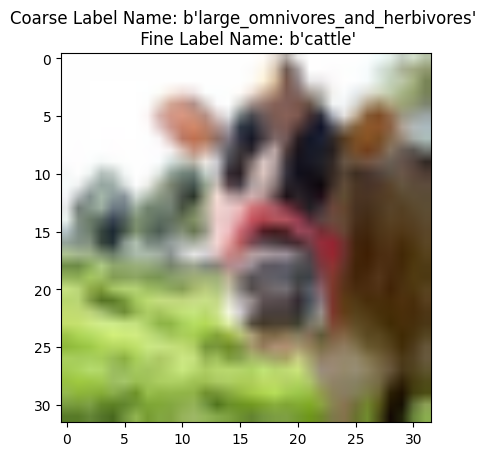

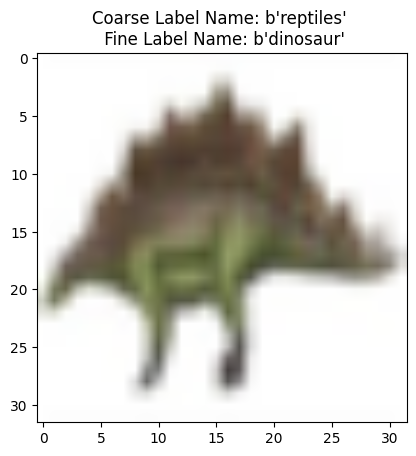

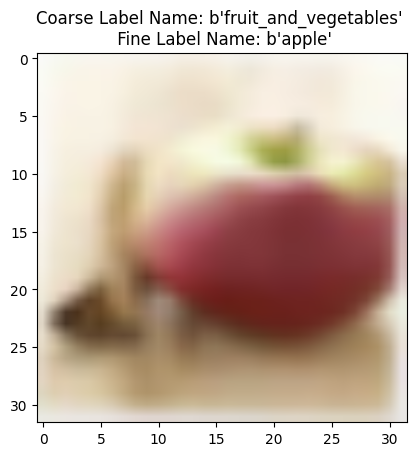

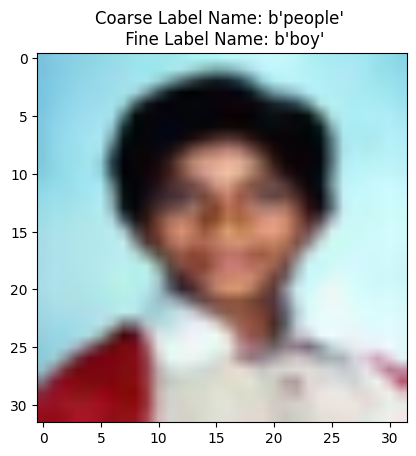

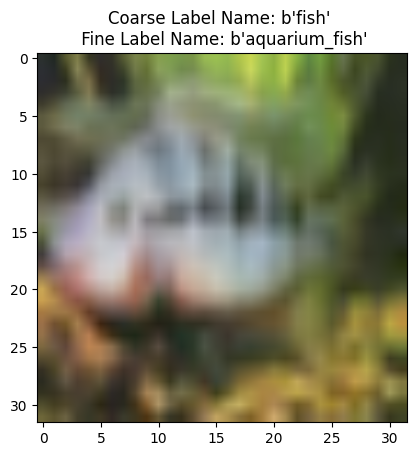

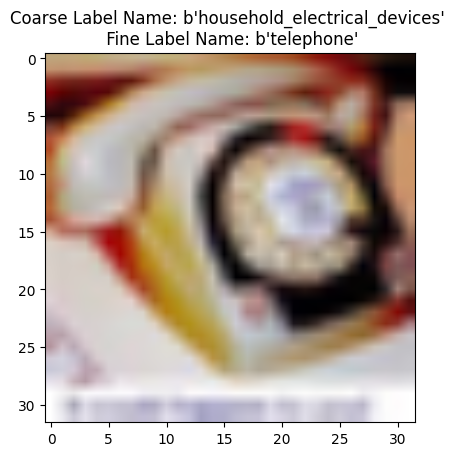

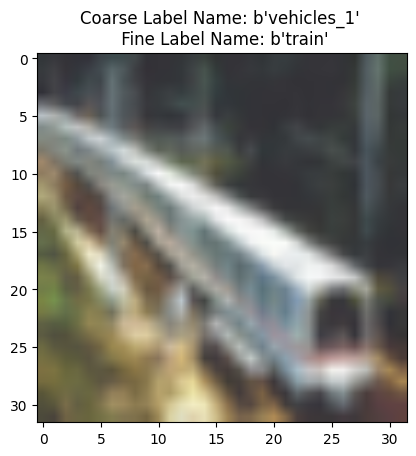

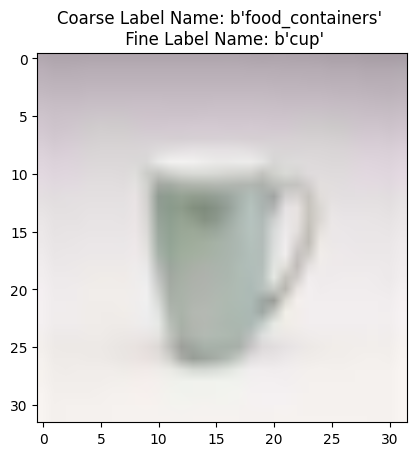

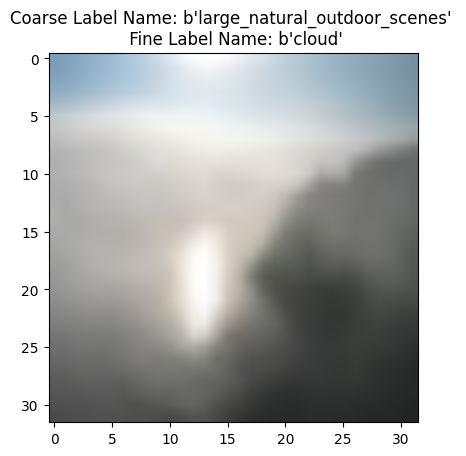

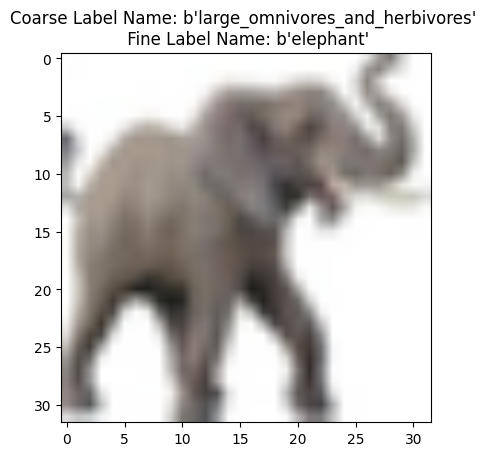

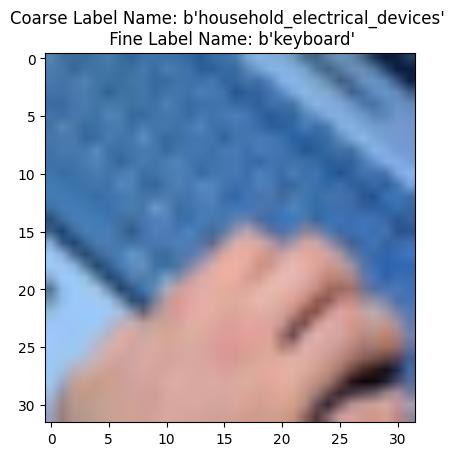

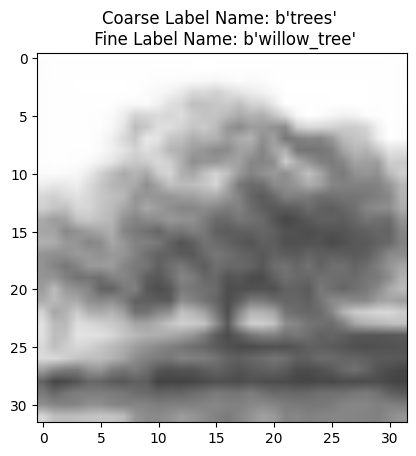

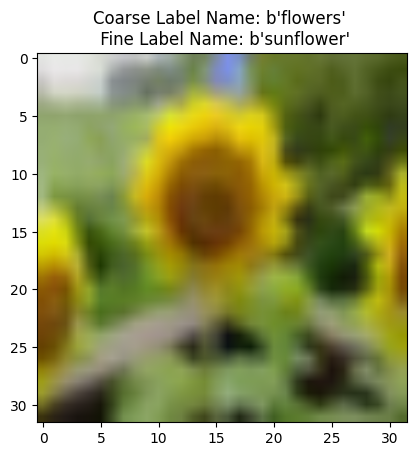

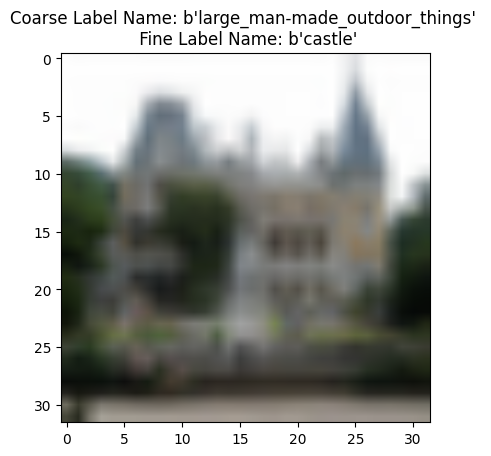

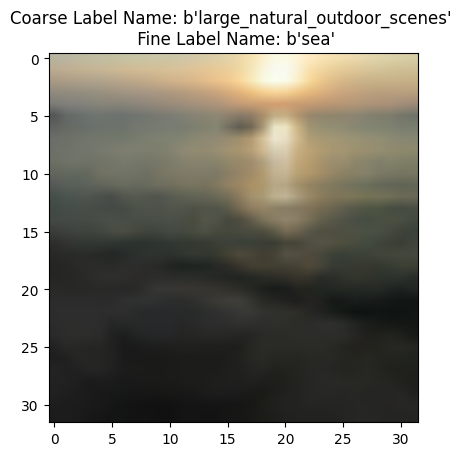

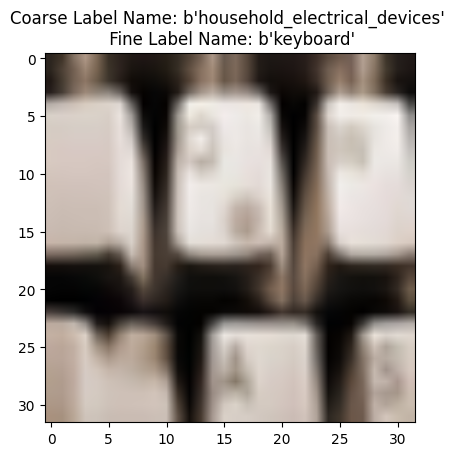

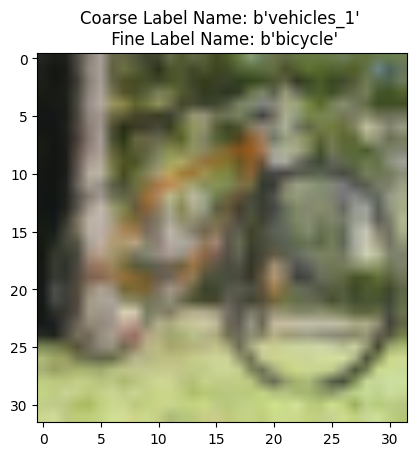

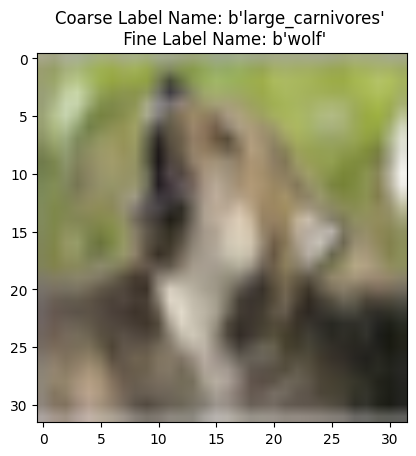

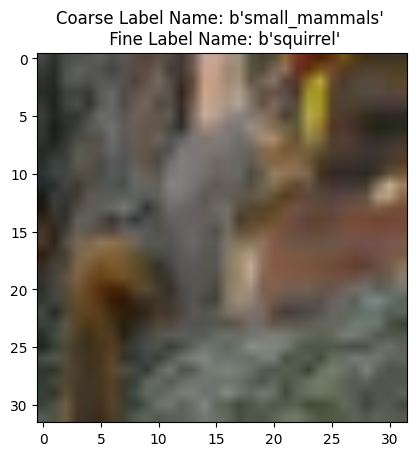

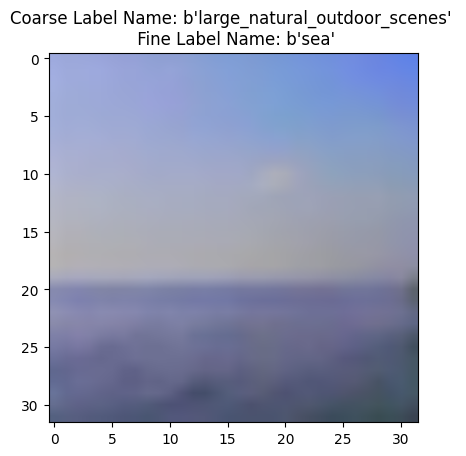

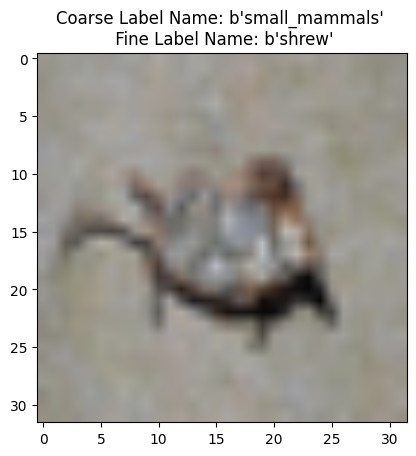

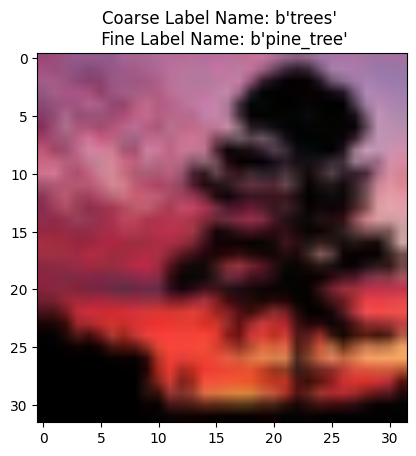

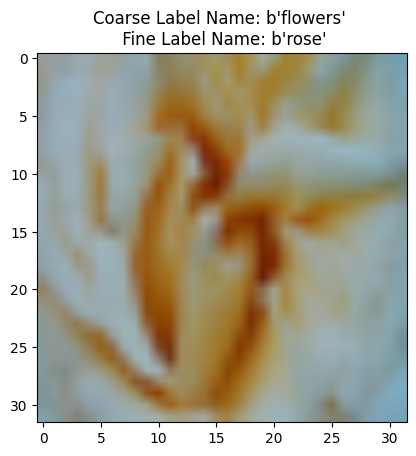

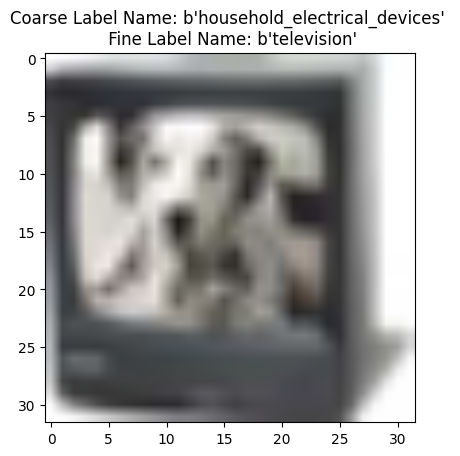

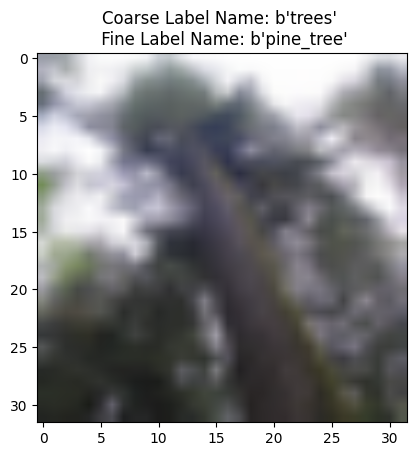

In [83]:
def mostrar_imagen(numero_imagen):
    # Take the image from the dataset
    image = data_original[b'data'][numero_imagen]
    # Reshape and transpose the image
    image = image.reshape(3, 32, 32).transpose(1, 2, 0)
    # Take coarse and fine labels of the image
    c_label = data_original[b'coarse_labels'][numero_imagen]
    f_label = data_original[b'fine_labels'][numero_imagen]
    # Take coarse and fine label names of the image
    coarse_name = meta_data[b'coarse_label_names'][c_label]
    fine_name = meta_data[b'fine_label_names'][f_label]
    # Display the image with interpolation
    plt.imshow(image, interpolation='bilinear')  # o use 'lanczos', 'bicubic', 'nearest' bilinear para suevadad de la imagen
    plt.title("Coarse Label Name: {} \n Fine Label Name: {}"
              .format(coarse_name, fine_name))
    plt.show()

for i in range(25):
    mostrar_imagen(i)

In [62]:
#ignorar dataframe la idea es que tengo tres columnas y unirlar a un dataframe,,, ver que cosas tengo para determinar la cantidad
#fuente: https://www.binarystudy.com/2021/09/how-to-load-preprocess-visualize-CIFAR-10-and-CIFAR-100.html#download

In [51]:
# pasar diccionario a dataframe
dataset_original_dataframe=pd.DataFrame.from_dict(data_original,orient='index').T ### se coloca la T para transponer

In [52]:
dataset_original_dataframe.sample(5)

,b'filenames',b'batch_label',b'fine_labels',b'coarse_labels',b'data'
45502,b'army_tank_s_000660.png',None,85,19,"[60, 49, 99, 78, 74, 145, 215, 249, 253, 255, ..."
43818,b'dolphin_s_002723.png',None,30,0,"[139, 149, 161, 174, 183, 187, 191, 193, 193, ..."
17074,b'drawbridge_s_002831.png',None,12,9,"[122, 132, 138, 149, 152, 161, 166, 144, 119, ..."
31053,b'alarm_clock_s_000956.png',None,22,5,"[125, 118, 127, 131, 133, 136, 139, 137, 145, ..."
28780,b'drawbridge_s_000959.png',None,12,9,"[192, 191, 191, 191, 191, 191, 191, 191, 191, ..."


# Clasificacion a 4 categorias

In [ ]:

'''
0->>   b'aquatic_mammals',
1-->> b'fish',
2-->> b'flowers',
3-->> b'food_containers',
4-->> b'fruit_and_vegetables',
5-->> b'household_electrical_devices',
6-->> b'household_furniture',
7-->> b'insects',
8-->> b'large_carnivores',
9-->> b'large_man-made_outdoor_things',
10-->> b'large_natural_outdoor_scenes',
11-->> b'large_omnivores_and_herbivores',
12-->> b'medium_mammals',
13-->> b'non-insect_invertebrates',
14-->> b'people',
15-->> b'reptiles',
16-->> b'small_mammals',
17-->> b'trees',
18-->> b'vehicles_1',
 19-->> b'vehicles_2'
 '''

In [ ]:
# humano
14 b'people'

#Animal
1 b'fish', 8 b'large_carnivores',13 b'non-insect_invertebrates', 15 b'reptiles', 11 b'large_omnivores_and_herbivores', 12 b'medium_mammals', 16 b'small_mammals'
    #regular
    b'aquatic_mammals', b'insects' (no se si ponerlo como animal)
    
#Objetos
18 b'vehicles_1', 19 b'vehicles_2',4 b'fruit_and_vegetables', 3 b'food_containers',5 b'household_electrical_devices',6 b'household_furniture'


# Paisajes
2 b'flowers'
17 b'trees'
10 b'large_natural_outdoor_scenes'
    # regular
    b'large_man-made_outdoor_things'
    

# Categoria humanos

In [1]:
dataset_humano=dataset_original_dataframe[dataset_original_dataframe[b'coarse_labels']==14]
dataset_humano=dataset_humano[:600] # me quedo con 600 para luego sacar los que no sirven

In [2]:
dataset_humano

,b'filenames',b'batch_label',b'fine_labels',b'coarse_labels',b'data'
3,b'altar_boy_s_001435.png',105,11,14,"[124, 131, 135, 138, 140, 144, 148, 152, 156, ..."
37,b'male_child_s_000800.png',None,11,14,"[184, 190, 191, 185, 177, 178, 180, 186, 187, ..."
46,b'boy_s_001150.png',None,11,14,"[230, 218, 253, 240, 210, 227, 246, 255, 253, ..."
58,b'black_woman_s_001310.png',None,98,14,"[165, 164, 139, 122, 113, 93, 74, 63, 67, 70, ..."
65,b'female_child_s_000292.png',None,35,14,"[220, 208, 213, 232, 239, 230, 163, 143, 150, ..."
...,...,...,...,...,...
11937,b'little_girl_s_000117.png',None,35,14,"[100, 84, 93, 82, 71, 55, 37, 30, 34, 35, 34, ..."
11954,b'boy_s_001233.png',None,11,14,"[40, 35, 25, 19, 20, 25, 22, 21, 30, 46, 25, 3..."
11986,b'young_girl_s_001489.png',None,35,14,"[133, 133, 132, 46, 22, 24, 20, 21, 22, 26, 28..."
11990,b'adam_s_001939.png',None,46,14,"[111, 116, 118, 121, 123, 124, 126, 128, 129, ..."


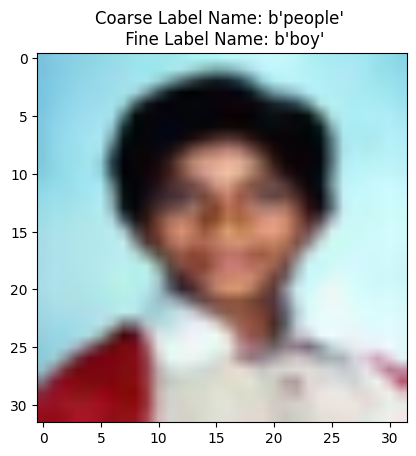

In [3]:
mostrar_imagen(3)

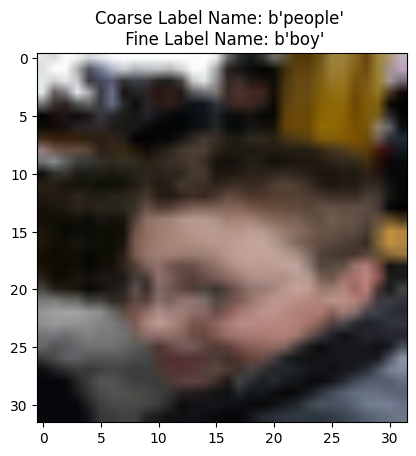

In [4]:
mostrar_imagen(46)

In [55]:
#0 b'aquatic_mammals' se ve muy mal
#12 b'medium_mammals', se ve mas o menos regular, lo tomo.
#16 b'small_mammals', se ve mas o menos regular, lo tomo.
# 2 b'flowers, para paisaje
# 3 b'food_container', se tratan de botes para objetos
# 5 b'household_electrical_devices, para objetos
# 6 b'household_furniture', para objetos
# 9 b'large_man-made_outdoor_things', me da dudas dejar por ahora
# 10 b'large_natural_outdoor_scenes'

dataset_original_dataframe[dataset_original_dataframe[b'coarse_labels']==10].sample(4)




,b'filenames',b'batch_label',b'fine_labels',b'coarse_labels',b'data'
2236,b'volcano_s_000733.png',None,49,10,"[253, 250, 248, 249, 251, 252, 251, 251, 249, ..."
1434,b'alp_s_002708.png',None,49,10,"[67, 68, 68, 68, 68, 68, 67, 67, 67, 67, 67, 6..."
34111,b'volcano_s_000153.png',None,49,10,"[26, 27, 28, 29, 31, 31, 32, 33, 34, 35, 37, 3..."
43524,b'alp_s_001959.png',None,49,10,"[88, 88, 89, 91, 92, 93, 94, 94, 94, 95, 97, 9..."


# Categoria Animal

In [56]:
filtro_contanetado_de_categorias = (dataset_original_dataframe[b'coarse_labels']==1) | (dataset_original_dataframe[b'coarse_labels']==8) | (dataset_original_dataframe[b'coarse_labels']==13) | (dataset_original_dataframe[b'coarse_labels']==15) | (dataset_original_dataframe[b'coarse_labels']==11) | (dataset_original_dataframe[b'coarse_labels']==12) | (dataset_original_dataframe[b'coarse_labels']==16);

dataset_animal=dataset_original_dataframe[filtro_contanetado_de_categorias]
dataset_animal=dataset_animal[:600]

# Categoria Objeto

In [57]:
filtro_concatenado_de_categorias_objeto = (dataset_original_dataframe[b'coarse_labels']==18)| \
    (dataset_original_dataframe[b'coarse_labels']==19)| \
    (dataset_original_dataframe[b'coarse_labels']==4) | \
    (dataset_original_dataframe[b'coarse_labels']==3) | \
    (dataset_original_dataframe[b'coarse_labels']==5) | \
    (dataset_original_dataframe[b'coarse_labels']==6)  


dataset_objeto=dataset_original_dataframe[filtro_concatenado_de_categorias_objeto]
dataset_objeto=dataset_objeto[:600]

# Categoria Paisaje

In [58]:
filtro_concatenado_de_categorias_paisajes=(dataset_original_dataframe[b'coarse_labels']==2)| \
    (dataset_original_dataframe[b'coarse_labels']==17)| \
    (dataset_original_dataframe[b'coarse_labels']==10)


dataset_paisaje=dataset_original_dataframe[filtro_concatenado_de_categorias_paisajes]
dataset_paisaje=dataset_paisaje[:600]

In [37]:
#dataset_humano
#dataset_animal
#dataset_objeto
#dataset_paisaje

,b'filenames',b'batch_label',b'fine_labels',b'coarse_labels',b'data'
8,b'fog_s_000397.png',32,23,10,"[122, 127, 134, 141, 150, 159, 168, 179, 193, ..."
11,b'willow_tree_s_000645.png',116,96,17,"[254, 255, 255, 255, 255, 255, 255, 255, 255, ..."
12,b'sunflower_s_000549.png',99,82,2,"[227, 233, 231, 231, 226, 215, 205, 195, 191, ..."
14,b'adriatic_s_001782.png',32,71,10,"[183, 185, 189, 191, 193, 194, 197, 200, 201, ..."
19,b'sea_s_000678.png',32,71,10,"[158, 156, 156, 155, 154, 152, 150, 149, 145, ..."
...,...,...,...,...,...
1580,b'rose_s_002291.png',None,70,2,"[93, 86, 73, 72, 78, 81, 58, 35, 23, 13, 32, 2..."
1590,b'cirrostratus_s_000837.png',None,23,10,"[115, 97, 99, 104, 107, 106, 103, 109, 119, 12..."
1591,b'alp_s_001550.png',None,49,10,"[214, 213, 216, 218, 220, 222, 223, 224, 226, ..."
1594,b'forest_s_000248.png',None,33,10,"[103, 110, 136, 137, 122, 104, 79, 72, 80, 91,..."


In [59]:
dataset_original_dataframe.sample(2)

,b'filenames',b'batch_label',b'fine_labels',b'coarse_labels',b'data'
24807,b'boy_s_002074.png',None,11,14,"[0, 0, 0, 0, 0, 2, 0, 12, 80, 170, 227, 253, 2..."
44736,b'bed_s_001110.png',None,5,6,"[255, 255, 255, 255, 255, 255, 255, 255, 255, ..."


In [60]:
lista_etiquetas=meta_data[ b'fine_label_names']

lista_etiquetas=[elemento.decode() for elemento in lista_etiquetas]

In [61]:
diccionario_etiquetas = {}

for i, nombre in enumerate(lista_etiquetas,start=0):
    diccionario_etiquetas[i]=nombre

# pruebas
def convertir_etiqueta(columna_clave):
    return diccionario_etiquetas.get(columna_clave)

Aplicando etiquetas

In [6]:
#Un poco rebuscado creo que un apply era mas sencillo
dataset_humano.loc[:,"etiqueta"]=dataset_humano.apply(lambda columna: convertir_etiqueta(columna[b'fine_labels']),axis=1)
dataset_animal.loc[:,"etiqueta"]=dataset_animal.apply(lambda columna: convertir_etiqueta(columna[b'fine_labels']),axis=1)
dataset_objeto.loc[:,"etiqueta"]=dataset_objeto.apply(lambda columna: convertir_etiqueta(columna[b'fine_labels']),axis=1)
dataset_paisaje.loc[:,"etiqueta"]=dataset_paisaje.apply(lambda columna: convertir_etiqueta(columna[b'fine_labels']),axis=1)

In [7]:
dataset_humano.sample(10)

,b'filenames',b'batch_label',b'fine_labels',b'coarse_labels',b'data',etiqueta
2270,b'boy_s_000389.png',None,11,14,"[14, 17, 20, 22, 22, 21, 22, 24, 24, 23, 21, 2...",boy
11309,b'adam_s_000420.png',None,46,14,"[221, 221, 224, 223, 224, 225, 226, 227, 228, ...",man
3891,b'baby_s_001605.png',None,2,14,"[76, 70, 44, 43, 57, 59, 86, 134, 136, 110, 11...",baby
4979,b'woman_s_000158.png',None,98,14,"[100, 103, 106, 106, 110, 113, 116, 120, 122, ...",woman
4685,b'black_woman_s_000740.png',None,98,14,"[139, 186, 201, 204, 203, 203, 183, 186, 205, ...",woman
181,b'male_child_s_000374.png',None,11,14,"[252, 240, 247, 255, 255, 255, 255, 255, 255, ...",boy
5296,b'black_woman_s_000752.png',None,98,14,"[45, 35, 16, 16, 157, 226, 228, 200, 165, 172,...",woman
10494,b'man_s_000977.png',None,46,14,"[255, 255, 255, 255, 255, 255, 255, 255, 255, ...",man
7990,b'sweater_girl_s_001035.png',None,35,14,"[233, 230, 230, 228, 226, 225, 225, 225, 225, ...",girl
9897,b'cain_s_000716.png',None,46,14,"[7, 6, 20, 56, 83, 73, 84, 83, 44, 17, 20, 62,...",man


In [64]:
dataset_animal

,b'filenames',b'batch_label',b'fine_labels',b'coarse_labels',b'data',etiqueta
0,b'bos_taurus_s_000507.png',116,19,11,"[255, 255, 255, 255, 255, 255, 255, 255, 255, ...",cattle
1,b'stegosaurus_s_000125.png',114,29,15,"[255, 253, 253, 253, 253, 253, 253, 253, 253, ...",dinosaur
4,b'cichlid_s_000031.png',110,1,1,"[43, 32, 87, 127, 55, 48, 51, 87, 121, 113, 13...",aquarium_fish
9,b'rogue_elephant_s_000421.png',98,31,11,"[255, 255, 255, 255, 255, 255, 255, 255, 255, ...",elephant
17,b'wolf_pup_s_001323.png',111,97,8,"[167, 161, 170, 168, 163, 166, 165, 166, 167, ...",wolf
...,...,...,...,...,...,...
1704,b'possum_s_001972.png',None,64,12,"[204, 112, 53, 79, 120, 154, 173, 191, 172, 12...",possum
1706,b'crab_s_001787.png',None,26,13,"[206, 203, 205, 207, 208, 208, 208, 208, 209, ...",crab
1708,b'trout_s_001685.png',None,91,1,"[77, 80, 38, 56, 26, 5, 2, 7, 15, 16, 45, 75, ...",trout
1710,b'spider_s_002605.png',None,79,13,"[23, 22, 22, 24, 26, 25, 25, 26, 30, 26, 33, 4...",spider


In [65]:
dataset_objeto

,b'filenames',b'batch_label',b'fine_labels',b'coarse_labels',b'data',etiqueta
2,b'mcintosh_s_000643.png',97,0,4,"[250, 248, 247, 248, 249, 249, 248, 248, 247, ...",apple
5,b'phone_s_002161.png',105,86,5,"[190, 191, 194, 191, 190, 192, 195, 197, 195, ...",telephone
6,b'car_train_s_000043.png',110,90,18,"[50, 56, 52, 50, 51, 61, 61, 63, 66, 50, 52, 5...",train
7,b'beaker_s_000604.png',103,28,3,"[178, 175, 175, 175, 176, 176, 176, 176, 176, ...",cup
10,b'computer_keyboard_s_000757.png',97,39,5,"[83, 67, 61, 58, 66, 72, 59, 50, 64, 63, 62, 6...",keyboard
...,...,...,...,...,...,...
2020,b'easy_chair_s_000042.png',None,20,6,"[234, 227, 228, 228, 230, 231, 231, 231, 231, ...",chair
2021,b'couch_s_001643.png',None,25,6,"[140, 144, 147, 150, 151, 152, 152, 150, 148, ...",couch
2023,b'bartlett_pear_s_000036.png',None,57,4,"[253, 255, 255, 255, 255, 255, 253, 252, 250, ...",pear
2024,b'navel_orange_s_000458.png',None,53,4,"[112, 114, 113, 112, 112, 121, 139, 153, 157, ...",orange


In [66]:
dataset_paisaje

,b'filenames',b'batch_label',b'fine_labels',b'coarse_labels',b'data',etiqueta
8,b'fog_s_000397.png',32,23,10,"[122, 127, 134, 141, 150, 159, 168, 179, 193, ...",cloud
11,b'willow_tree_s_000645.png',116,96,17,"[254, 255, 255, 255, 255, 255, 255, 255, 255, ...",willow_tree
12,b'sunflower_s_000549.png',99,82,2,"[227, 233, 231, 231, 226, 215, 205, 195, 191, ...",sunflower
14,b'adriatic_s_001782.png',32,71,10,"[183, 185, 189, 191, 193, 194, 197, 200, 201, ...",sea
19,b'sea_s_000678.png',32,71,10,"[158, 156, 156, 155, 154, 152, 150, 149, 145, ...",sea
...,...,...,...,...,...,...
3952,b'pine_s_001532.png',None,59,17,"[112, 119, 121, 120, 129, 130, 132, 133, 138, ...",pine_tree
3967,b'butterfly_orchid_s_000247.png',None,54,2,"[33, 32, 32, 31, 28, 25, 19, 16, 11, 8, 8, 6, ...",orchid
3987,b'aegean_s_000760.png',None,71,10,"[91, 92, 93, 94, 96, 99, 102, 103, 106, 108, 1...",sea
3988,b'field_s_001615.png',None,60,10,"[98, 99, 101, 106, 109, 107, 106, 114, 121, 12...",plain


# Añadir singularidad a los dataset

In [67]:
%pip install -U pip setuptools wheel
%pip install -U spacy
%python -m spacy download en_core_web_sm

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


UsageError: Line magic function `%python` not found (But cell magic `%%python` exists, did you mean that instead?).


In [68]:
import spacy

#se carga el modelo en ingles
nlp=spacy.load("en_core_web_sm")

def cantidad(palabra:str):
    # procesar palabra con el modelo
    doc= nlp(palabra)
    
    for token in doc:
        # para verificar el sujeto
        if token.pos_=="NOUN":
            
            # Comprobamos si esta marcado como plural en las características morfológicas
            if token.tag_=="NNS" or token.tag_=="NNPS":  # NNS y NNPS son las etiquetas plurales
                es_plural= "plural"
                return es_plural
            else:
                es_plural="singular"
                return es_plural
    
    # Si da error
    es_plural="N/A"
    return es_plural

In [8]:
dataset_humano.loc[:,"singularidad"]=dataset_humano['etiqueta'].apply(cantidad)

In [70]:
dataset_animal.loc[:,"singularidad"]=dataset_animal['etiqueta'].apply(cantidad)

In [71]:
dataset_objeto.loc[:,"singularidad"]=dataset_objeto['etiqueta'].apply(cantidad)

In [72]:
dataset_paisaje.loc[:,"singularidad"]=dataset_paisaje['etiqueta'].apply(cantidad)

In [10]:
# eliminar las que contenga N/A es los dataset de categorias
dataset_humano=dataset_humano[dataset_humano['singularidad']!='N/A']
dataset_animal=dataset_animal[dataset_animal['singularidad']!='N/A']
dataset_objeto=dataset_objeto[dataset_objeto['singularidad']!='N/A']
dataset_paisaje=dataset_paisaje[dataset_paisaje['singularidad']!='N/A']

In [11]:
dataset_humano=dataset_humano[:250]
dataset_animal=dataset_animal[:250]
dataset_objeto=dataset_objeto[:250]
dataset_paisaje=dataset_paisaje[:250]

# Colocando Categorias

In [12]:
dataset_humano.loc[:,'categoria']='Human'
dataset_animal.loc[:,'categoria']='Animal'
dataset_objeto.loc[:,'categoria']='Object'
dataset_paisaje.loc[:,'categoria']='Landscape'

In [76]:
dataset_humano
dataset_animal
dataset_objeto
dataset_paisaje

,b'filenames',b'batch_label',b'fine_labels',b'coarse_labels',b'data',etiqueta,singularidad,categoria
12,b'sunflower_s_000549.png',99,82,2,"[227, 233, 231, 231, 226, 215, 205, 195, 191, ...",sunflower,singular,Landscape
14,b'adriatic_s_001782.png',32,71,10,"[183, 185, 189, 191, 193, 194, 197, 200, 201, ...",sea,singular,Landscape
19,b'sea_s_000678.png',32,71,10,"[158, 156, 156, 155, 154, 152, 150, 149, 145, ...",sea,singular,Landscape
21,b'pine_tree_s_000087.png',None,59,17,"[152, 154, 152, 150, 149, 148, 147, 162, 166, ...",pine_tree,singular,Landscape
24,b'pine_s_001533.png',None,59,17,"[153, 155, 162, 206, 242, 250, 252, 251, 248, ...",pine_tree,singular,Landscape
...,...,...,...,...,...,...,...,...
3740,b'pine_s_001589.png',None,59,17,"[166, 167, 167, 166, 167, 169, 172, 172, 172, ...",pine_tree,singular,Landscape
3750,b'volcano_s_000898.png',None,49,10,"[123, 133, 150, 165, 175, 185, 191, 188, 194, ...",mountain,singular,Landscape
3765,b'forest_s_001871.png',None,33,10,"[84, 103, 128, 74, 80, 109, 116, 102, 64, 63, ...",forest,singular,Landscape
3783,b'sea_s_001335.png',None,71,10,"[54, 56, 56, 57, 58, 59, 59, 59, 60, 60, 60, 6...",sea,singular,Landscape


In [89]:
len(dataset_humano[b'data'][5])

3072

In [81]:
dataset_humano[b'data'][5]

array([190, 191, 194, ..., 252, 254, 255], dtype=uint8)

# Guardando Dataset "sub_datasets_cifar_250"

In [14]:
# guardar los subsdatasets.

pickle.dump(dataset_humano,open('dataset_humano_cifar_250_v3_29_06_2024.pickle', 'wb'))
#pickle.dump(dataset_animal,open('dataset_animal_cifar_250_v3_29_06_2024.pickle', 'wb'))
#pickle.dump(dataset_objeto,open('dataset_objeto_cifar_250_v3_29_06_2024.pickle', 'wb'))
#pickle.dump(dataset_paisaje,open('dataset_paisaje_cifar_250_v3_29_06_2024.pickle', 'wb'))

In [15]:
##descargar los datasets
%cd /kaggle/working
from IPython.display import FileLink
FileLink('dataset_humano_cifar_250_v3_29_06_2024.pickle')

/kaggle/working


/kaggle/working/dataset_humano_cifar_250_v3_29_06_2024.pickle

In [136]:
FileLink('dataset_animal_cifar_250_v3_29_06_2024.pickle')

/kaggle/working/dataset_animal_cifar_250_v3_29_06_2024.pickle

In [137]:
FileLink('dataset_paisaje_cifar_250_v3_29_06_2024.pickle')

/kaggle/working/dataset_paisaje_cifar_250_v3_29_06_2024.pickle

In [138]:
FileLink('dataset_objeto_cifar_250_v3_29_06_2024.pickle')

/kaggle/working/dataset_objeto_cifar_250_v3_29_06_2024.pickle

In [ ]:
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict


data_prueba =unpickle('dataset_humano_cifar_250_v2_29_06_2024.pickle')